## Tip Prediction Using Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load tips dataset from seaborn dataset

df_tips = sns.load_dataset('tips')

In [3]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
xtip = df_tips[['total_bill']]
ytip = df_tips['tip']

In [5]:
Model = linear_model.LinearRegression()
Model.fit(xtip,ytip)

LinearRegression()

In [13]:
## Create tip prediction column

df_tips['tip_prediction'] = (Model.predict(xtip)).round(2)
df_tips

,total_bill,tip,sex,smoker,day,time,size,tip_prediction,Error
0,16.99,1.01,Female,No,Sun,Dinner,2,2.70,1.694636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.01,0.346223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.13,0.373165
3,23.68,3.31,Male,No,Sun,Dinner,2,3.41,0.097250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.50,0.107178
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.97,1.950869
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.77,1.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.30,1.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.79,1.041807


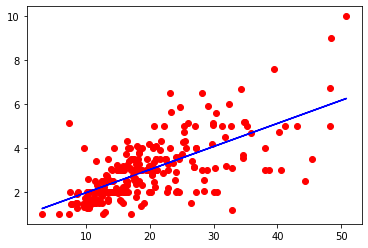

In [7]:
## Create visualization for actual tips and predicted tips

plt.scatter(df_tips['total_bill'], df_tips['tip'], color='red')
plt.plot(df_tips['total_bill'], df_tips['tip_prediction'], color='blue')
plt.show()

In [8]:
## Create 'Error' column to calculate the Mean Absolute Error (MAE) score

df_tips['Error'] = abs(df_tips['tip'] - df_tips['tip_prediction'])

In [9]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_prediction,Error
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,0.373165
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,0.107178


In [10]:
## Calculate MAE score

df_tips['Error'].mean()

0.7458253894586339

<Figure size 720x864 with 0 Axes>

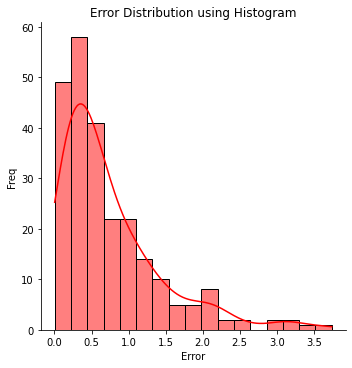

In [23]:
## Visualization for Error using Histogram

plt.figure(figsize=(10,12))
sns.displot(df_tips['Error'], kde=True,
color='red')
plt.title('Error Distribution using Histogram')
plt.ylabel('Freq')
plt.show()

## The error was not normally distributed. Thus, the model needs more improvement in order to predict more accurately.

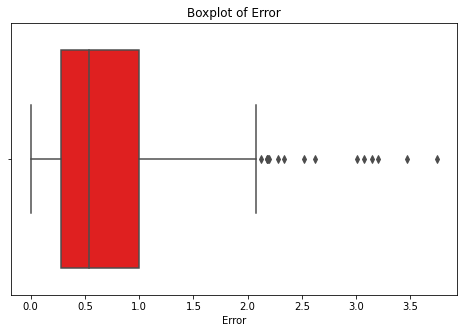

In [26]:
## Visualization of Error using boxplot

plt.figure(figsize=(8,5))
sns.boxplot(df_tips['Error'], color='red')
plt.title('Boxplot of Error')
plt.show()

## The boxplot show us that the error above 2.0, is an outlier.